# Text mining and natural language processing with Python: A gentle introduction

Text mining and natural language processing are techniques used to analyze ("read") large collections of narrative data. This notebook is a gentle introduction to such things using a programming lanague called Pyton as an example. --Eric Lease Morgan &lt;emorgan@nd.edu&gt; (September 27, 2022)

## Initialize

In [1]:
# configure
FILE = 'homer.txt'


In [2]:
# require
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import re
import wordcloud


## Read

In [3]:
# slurp up the given file
with open( FILE ) as handle : data = handle.read()
    

In [4]:
# output
print( data )




The Iliad and The Odyssey by Homer

The quarrel between Agamemnon and Achilles—Achilles withdraws from the war, and sends his mother Thetis to ask Jove to help the Trojans—Scene between Jove and Juno on Olympus.

Sing, O goddess, the anger of Achilles son of Peleus, that brought countless ills upon the Achaeans. Many a brave soul did it send hurrying down to Hades, and many a hero did it yield a prey to dogs and vultures, for so were the counsels of Jove fulfilled from the day on which the son of Atreus, king of men, and great Achilles, first fell out with one another.

And which of the gods was it that set them on to quarrel? It was the son of Jove and Leto; for he was angry with the king and sent a pestilence upon the host to plague the people, because the son of Atreus had dishonoured Chryses his priest. Now Chryses had come to the ships of the Achaeans to free his daughter, and had brought with him a great ransom: moreover he bore in his hand the sceptre of Apollo wreathed with a

## Extract features

In [5]:
# tokenize and normalize the given data; create a list of features
features = nltk.word_tokenize( data )
features = [ feature for feature in features if feature.isalpha() ]
features = [ feature.lower() for feature in features ]

# import a list of stopwords and remove them from the list of features
from nltk.corpus import stopwords
stopwords = stopwords.words( 'english' )
features  = [ feature for feature in features if feature not in stopwords ]

# output
print( features )


['iliad', 'odyssey', 'homer', 'quarrel', 'agamemnon', 'withdraws', 'war', 'sends', 'mother', 'thetis', 'ask', 'jove', 'help', 'jove', 'juno', 'olympus', 'sing', 'goddess', 'anger', 'achilles', 'son', 'peleus', 'brought', 'countless', 'ills', 'upon', 'achaeans', 'many', 'brave', 'soul', 'send', 'hurrying', 'hades', 'many', 'hero', 'yield', 'prey', 'dogs', 'vultures', 'counsels', 'jove', 'fulfilled', 'day', 'son', 'atreus', 'king', 'men', 'great', 'achilles', 'first', 'fell', 'one', 'another', 'gods', 'set', 'quarrel', 'son', 'jove', 'leto', 'angry', 'king', 'sent', 'pestilence', 'upon', 'host', 'plague', 'people', 'son', 'atreus', 'dishonoured', 'chryses', 'priest', 'chryses', 'come', 'ships', 'achaeans', 'free', 'daughter', 'brought', 'great', 'ransom', 'moreover', 'bore', 'hand', 'sceptre', 'apollo', 'wreathed', 'suppliant', 'wreath', 'besought', 'achaeans', 'two', 'sons', 'atreus', 'chiefs', 'sons', 'atreus', 'cried', 'achaeans', 'may', 'gods', 'dwell', 'olympus', 'grant', 'sack', 'c

## Extract ngrams

In [6]:
# create a list of ngrams
ngrams = list( nltk.ngrams( features, 2 ) )

# count & tabulate them; create a frequency list
frequencies = {}
for ngram in ngrams :
    
    # build the ngram
    ngram = ' '.join( ngram )
    
    # update the frequency list
    if ngram in frequencies : frequencies[ ngram ] += 1
    else                    : frequencies[ ngram ] =  1

# sort the result and output
frequencies = dict( sorted( frequencies.items(), key=lambda x:x[ 1 ], reverse=True ) )
print( frequencies )


{'one another': 163, 'let us': 149, 'son atreus': 129, 'son peleus': 105, 'son tydeus': 85, 'father jove': 74, 'son saturn': 72, 'old man': 69, 'went back': 57, 'every one': 56, 'ships achaeans': 55, 'house hades': 51, 'every man': 49, 'king agamemnon': 48, 'ajax son': 48, 'son telamon': 46, 'trojans achaeans': 43, 'noble son': 42, 'thus speak': 41, 'son priam': 41, 'eat drink': 40, 'thus spoke': 39, 'go back': 37, 'one else': 36, 'ulysses said': 35, 'phoebus apollo': 33, 'bearing jove': 32, 'upon ground': 32, 'even though': 32, 'sons achaeans': 31, 'among trojans': 31, 'gods men': 30, 'loud cry': 30, 'hector son': 30, 'never yet': 29, 'could see': 29, 'therefore let': 29, 'said ulysses': 29, 'said son': 28, 'come back': 28, 'achilles son': 27, 'two sons': 27, 'son menoetius': 27, 'either side': 27, 'get home': 27, 'let go': 27, 'fell upon': 27, 'fell heavily': 27, 'back ships': 26, 'agamemnon son': 26, 'took seat': 26, 'led way': 26, 'ulysses answered': 26, 'went among': 25, 'son laer

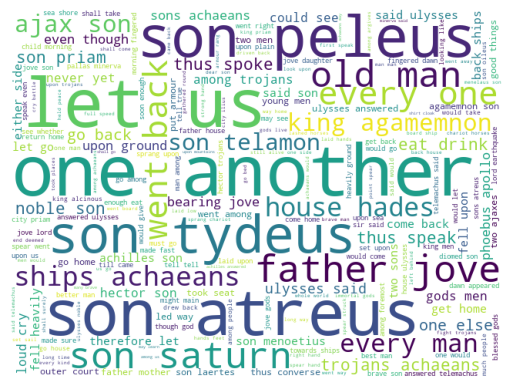

In [7]:
# visualize the results
cloud = wordcloud.WordCloud( width=640, height=480, background_color='white' )
cloud.generate_from_frequencies( frequencies )
plt.imshow( cloud )
plt.axis( "off" )
plt.show()


## Create an NTLK Text object and visualize some more

In [8]:
# re-normalize the data and create a NLTK Text object
features = nltk.word_tokenize( data )
features = [ feature.lower() for feature in features ]
text     = nltk.Text( features )


In [9]:
# use the Text object to do concordancing; perform a simple keyword-in-context query
text.concordance( 'penelope' )


Displaying 25 of 105 matches:
k out to the suitors of his mother penelope , who persist in eating up any num
of your race dying out yet , while penelope has such a fine son as you are . b
nerva had laid upon the achaeans . penelope , daughter of icarius , heard his 
u have the blood of ulysses and of penelope in your veins i see no likelihood 
 father , his long- suffering wife penelope , and his son telemachus , whom he
he buildings . it was not long ere penelope came to know what the suitors were
 crossed the threshold of her room penelope said : '' medon , what have the su
o get news of his father . '' then penelope 's heart sank within her , and for
he went downstairs again , leaving penelope in an agony of grief . there were 
nd dried the tears from her eyes . penelope washed her face , changed her dres
aited till night should fall . but penelope lay in her own room upstairs unabl
d made a vision in the likeness of penelope 's sister iphthime daughter of ica
the house of ulysses ,

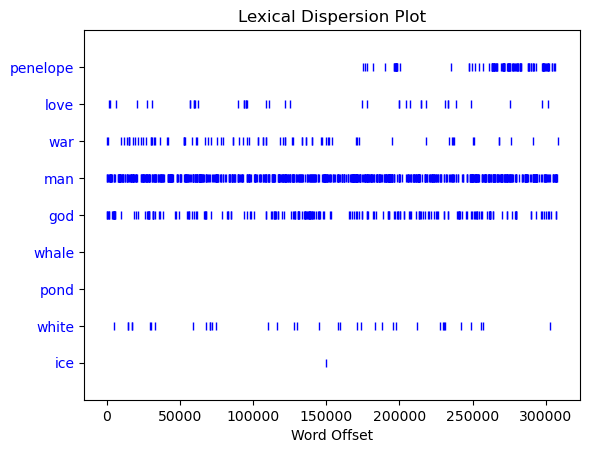

In [10]:
# create a dispersion chart from a list of given words
text.dispersion_plot( [ 'penelope', 'love', 'war', 'man', 'god', 'whale', 'pond', 'white', 'ice' ] )


## Process sentences

In [11]:
# create a normalized list of sentences
sentences = nltk.sent_tokenize( data )
sentences = [ sentence.replace( '\n', ' ' ) for sentence in sentences ]
sentences = [ re.sub( ' +', ' ', sentence ) for sentence in sentences ]
sentences = [ re.sub( '^ ', '', sentence )  for sentence in sentences ]

# output
for sentence in sentences : print( sentence, '\n' )


The Iliad and The Odyssey by Homer The quarrel between Agamemnon and Achilles—Achilles withdraws from the war, and sends his mother Thetis to ask Jove to help the Trojans—Scene between Jove and Juno on Olympus. 

Sing, O goddess, the anger of Achilles son of Peleus, that brought countless ills upon the Achaeans. 

Many a brave soul did it send hurrying down to Hades, and many a hero did it yield a prey to dogs and vultures, for so were the counsels of Jove fulfilled from the day on which the son of Atreus, king of men, and great Achilles, first fell out with one another. 

And which of the gods was it that set them on to quarrel? 

It was the son of Jove and Leto; for he was angry with the king and sent a pestilence upon the host to plague the people, because the son of Atreus had dishonoured Chryses his priest. 

Now Chryses had come to the ships of the Achaeans to free his daughter, and had brought with him a great ransom: moreover he bore in his hand the sceptre of Apollo wreathed w

In [12]:
# query all sentences for a given word/phrase
query = 'penelope'
for sentence in sentences :
    if query in sentence.lower() : print( sentence, '\n')


In the meantime I will go to Ithaca, to put heart into Ulysses ' son Telemachus; I will embolden him to call the Achaeans in assembly, and speak out to the suitors of his mother Penelope, who persist in eating up any number of his sheep and oxen; I will also conduct him to Sparta and to Pylos, to see if he can hear anything about the return of his dear father— for this will make people speak well of him." 

And Minerva said," There is no fear of your race dying out yet, while Penelope has such a fine son as you are. 

Penelope, daughter of Icarius, heard his song from her room upstairs, and came down by the great staircase, not alone, but attended by two of her handmaids. 

If, then, you take after him, your voyage will not be fruitless, but unless you have the blood of Ulysses and of Penelope in your veins I see no likelihood of your succeeding. 

His old father, his long- suffering wife Penelope, and his son Telemachus, whom he left behind him an infant in arms, are plunged in grief 

## Extract parts-of-speech

In [13]:
# process each sentence; count & tabulate some parts of speech
nouns      = {}
verbs      = {}
adjectives = {}
for sentence in sentences :
    
    # associate each word in the sentence with a part-of-speech
    partsofspeech = nltk.pos_tag( nltk.word_tokenize( sentence ) )
    
    # process each part (word)
    for part in partsofspeech :
        
        # parse the part
        word = part[ 0 ].lower()
        pos  = part[ 1 ]
        
        # check for noun
        if pos.startswith( 'N') :
            
            # update the list of nouns
            if word in nouns : nouns[ word ] += 1
            else             : nouns[ word ] =  1
                
        # check for verb
        elif pos.startswith( 'V' ) :
            
            # update the list of verbs
            if word in verbs : verbs[ word ] += 1
            else             : verbs[ word ] =  1
                
        # check for adjective
        elif pos.startswith( 'J' ) :
            
            # update the list of adjectives
            if word in adjectives : adjectives[ word ] += 1
            else                  : adjectives[ word ] =  1

# sort the results
nouns      = dict( sorted( nouns.items(),      key=lambda x:x[ 1 ], reverse=True ) )
verbs      = dict( sorted( verbs.items(),      key=lambda x:x[ 1 ], reverse=True ) )
adjectives = dict( sorted( adjectives.items(), key=lambda x:x[ 1 ], reverse=True ) )

# output
print( verbs )


{'was': 2165, 'had': 1729, 'is': 1580, 'have': 1516, 'were': 1152, 'are': 1094, 'be': 1091, 'said': 885, 'did': 749, 'has': 675, 'do': 660, 'went': 628, 'let': 521, 'go': 521, 'come': 502, 'been': 494, 'came': 480, 'take': 426, 'made': 424, 'took': 403, 'see': 374, 'am': 337, 'tell': 336, 'set': 316, 'answered': 300, 'give': 286, 'make': 279, 'saw': 265, 'fell': 252, 'spoke': 240, 'left': 239, 'put': 230, 'got': 225, 'know': 221, 'killed': 216, 'brought': 208, 'saying': 208, 'gave': 207, 'say': 203, 'get': 195, 'sent': 173, 'heard': 171, 'fight': 168, 'laid': 165, 'struck': 163, 'going': 159, 'stood': 153, 'find': 151, 'being': 148, 'told': 148, 'done': 147, 'lay': 145, 'keep': 143, 'bring': 143, 'drew': 135, 'held': 135, 'fighting': 132, 'speak': 131, 'reached': 124, 'given': 119, 'hold': 119, 'ulysses': 118, 'began': 117, 'stay': 116, 'gone': 115, 'think': 114, 'kept': 112, 'leave': 110, 'sat': 108, 'round': 108, 'having': 108, 'taken': 107, 'hear': 106, 'found': 106, 'kill': 105, 's

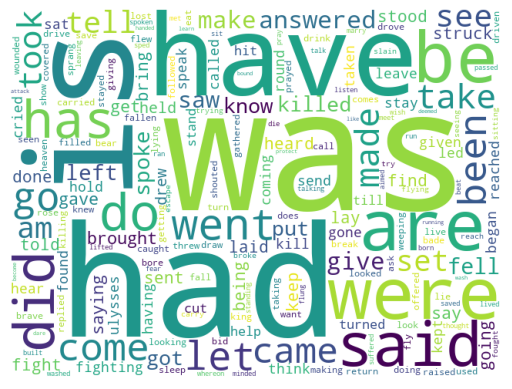

In [17]:
# visualize the results
cloud = wordcloud.WordCloud( width=640, height=480, background_color='white' )
cloud.generate_from_frequencies( verbs )
plt.imshow( cloud )
plt.axis( "off" )
plt.show()


## Extract grammars

In [15]:
# define a grammar
svo = '''
  NOUNPHRASE: {<DT>?<JJ.*>*<NN.?>+}
   PREDICATE: {<VB.*>?}
     GRAMMAR: {<NOUNPHRASE><PREDICATE><NOUNPHRASE>}
'''

# initialize a parser used find the grammar as well as the output; tricky
parser = nltk.RegexpParser( svo )
svos   = []
    
# process each sentence
for sentence in sentences :
    
    # normalize and tokenize the sentence
    tokens = nltk.word_tokenize( sentence.lower() )

    # get parts-of-speech, create an NLTK tree, and re-initialize a variable
    pos  = nltk.pos_tag( tokens )
    tree = parser.parse( pos )
    svo  = []
    
    # process each branch; look for our particular grammar
    for branch in tree.subtrees( lambda t : t.label() == 'GRAMMAR' ) : 
    
        # process each limb
        for limb in [ branch[ 0 ], branch[ 1 ], branch[ 2 ] ] :

            # parse
            words  = []
            leaves = limb.leaves()
            for leaf in leaves : words.append( leaf[ 0 ] )
            
            # update
            svo.append( ' '.join( words ) )

        # update and break; only process a single branch
        svos.append( svo )  
        break

# output
for svo in svos : print( svo )


['all day', 'long', 'the pyres']
['assembly—', 'moved', 'thereto']
['eyes', 'flashed', 'fire']
['i', 'have', 'no quarrel']
['the achaeans', 'sack', 'any rich city']
['i', 'have', 'others']
['men', 'fall', 'dying']
['gold-', 'bestudded', 'sceptre']
['battle', 'is', 'a tower']
['agamemnon', 'drew', 'a vessel']
['atreus', 'bade', 'the people']
['achilles', 'drew', 'a deep sigh']
['the god', 'sent', 'a deadly dart']
['the immortals', 'saved', 'the son']
['the hundred-', 'handed', 'monster']
['jove', 'went', 'yesterday']
['meanwhile ulysses', 'reached', 'chryse']
['five-', 'pronged', 'spits']
['pages', 'filled', 'the mixing- bowl']
['all day', 'long', 'the young men']
['jove', 'led', 'the way']
['the goddess', 'quitted', 'the splendour']
['i', 'have', 'a strong misgiving']
['jove', 'sends', 'a lying dream']
['woe', 'betides', 'the trojans']
['woe', 'betides', 'the trojans']
['silver-', 'studded', 'sword']
['the people', 'gathered', 'thereon']
['figure', 'resembled', 'none']
['i', 'am', 'a m

In [16]:
# pour the result into a pandas dataframe, and save the result as CSV file
csv = 'svo.csv'
columns = [ 'subject', 'verb', 'object' ]
svo     = pd.DataFrame( svos, columns=columns  )
svo.to_csv( csv, index=False )


## Summary

This notebook has introduced the topic of text mining and natural language processing using Python. It covered a few things:

* reading a file
* parsing and normalizeing each of the words into features
* counting & tabulating the features; visualizing the result
* counting & tabulating ngrams; visualizing the result
* extracting sentences and filtering the result
* counting & tabulating parts-of-speech; visualizing the result
* defining a grammar, extracting sentence fragments matching the grammar, and saving the result

There are many other ways to process text, and most of them surround the idea of "modeling". Examples include full text indexing, topic modeling, semantic indexing, collocations, etc. But such things are for another notebook. 